### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)
row, col = m.shape
for i in range(row) : print( i , " raw mean " , np.mean(m[i, :]) )
for i in range(col) : print( i , " col mean " , np.mean(m[:, i]) )
print( "Total mean: ", np.mean(m))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
0  raw mean  1.5
1  raw mean  5.5
2  raw mean  9.5
0  col mean  4.0
1  col mean  5.0
2  col mean  6.0
3  col mean  7.0
Total mean:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u,v))
print(np.array([ x*y for x in u for y in v ]).reshape(4,4))
a = u.reshape(4,1)
print(a*v)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
import numpy.random as npr
a = npr.rand(10,6)
#mask = (a < 0.1 == True)
print(a, '\n')
a[np.any( (a < 0.1), axis=1),: ] = 0.
print(a)

[[0.10321928 0.60042473 0.48427382 0.17439964 0.91065386 0.61699016]
 [0.72005626 0.42533143 0.03723577 0.72678707 0.95897465 0.65350881]
 [0.72532799 0.36903762 0.91195676 0.31229842 0.5286646  0.54567549]
 [0.26960497 0.20056252 0.46903072 0.44886825 0.05719071 0.68822746]
 [0.76901536 0.30232877 0.54182256 0.03417561 0.7587507  0.92134067]
 [0.44377767 0.41564585 0.39044654 0.47496113 0.43638683 0.2070419 ]
 [0.12622072 0.69450982 0.40516728 0.87550784 0.2392651  0.30981295]
 [0.79122198 0.39209051 0.2510532  0.95822116 0.88157536 0.22231826]
 [0.321961   0.2218099  0.20105241 0.79912304 0.54292834 0.69732813]
 [0.33247941 0.27466826 0.10356721 0.28700797 0.0062722  0.4978989 ]] 

[[0.10321928 0.60042473 0.48427382 0.17439964 0.91065386 0.61699016]
 [0.         0.         0.         0.         0.         0.        ]
 [0.72532799 0.36903762 0.91195676 0.31229842 0.5286646  0.54567549]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.     

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[3.934924131769034, 3.8714576135146945, 0.8250647373064104, 0.7615982190520711]
[3.93492413 3.87145761 0.82506474 0.76159822]


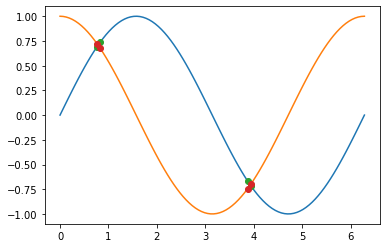

In [4]:
import matplotlib.pyplot as plt # everybody imports it that way
%matplotlib inline 

a = np.linspace(0, 2*np.pi, 100)
a = a[::-1]
print([ x for x in a if (np.abs(np.sin(x)-np.cos(x)) < 0.1 )])
mask =  (np.abs(np.sin(a)-np.cos(a)) < 0.1 )
b = a[mask]
print(b)

plt.plot(a, np.sin(a));
plt.plot(a, np.cos(a));
plt.plot(b, np.sin(b), "o")
plt.plot(b, np.cos(b), "o")

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
a = np.array([i*j for i in range(1,11) for j in range(1,11)]).reshape(10,10)
print(a)
print("Trace", np.trace(a))
print("Antidiagonal", np.diag(np.fliplr(a)) )
print("Upper diagonal", np.diag(a,+1) )

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace 385
Antidiagonal [10 18 24 28 30 30 28 24 18 10]
Upper diagonal [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
a = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print( abs( a-a.reshape(10,1) ))

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]


7. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
 

In [192]:
import numpy as np
N = 100

def prime (k):
    div = True
    mask = []
    visMask = []
    for i in range(k):
        for h in range(2,i):
            if i % h == 0: 
                div = False
        mask.append( div )
        visMask.append([i, div])
        div = True
    a = np.arange(k)[mask] 
    return a 

a = prime(N)
print(a)

#%timeit prime(10)
#%timeit prime(100)
#%timeit prime(1000)
#%timeit prime(10000) # N * 10 = time * 100

### Erathostene ###

def Era(k):
    lst = np.array([i for i in np.arange(k)])
    for i in range(2,k):
        if ( lst[i]!=-1 ):
            last = i
            for j in range(int(k/i)):
                if ( last+i < k ):
                    lst [last+i] = -1
                    last = last+i
    return lst[ lst != -1 ]
    

print(Era(100)) 

%timeit prime(100)
%timeit Era(100) #better


[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
238 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
76.7 µs ± 2.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

Yees! assuming mean == 0, variance goes like sqrt(N_steps). That was actually expected for a random walk


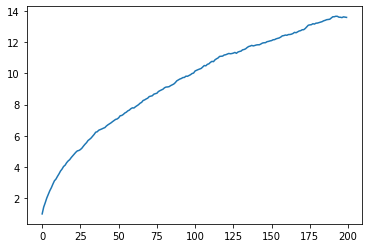

In [243]:
import numpy.random as npr
m = np.array(npr.randint(0,2, size=(1000,200)))
m[m == 0] = -1 

cmsum = np.cumsum(m,axis=1)     
cmsum = cmsum**2

distance = np.sqrt(np.mean(cmsum, axis = 0))
plt.plot(np.arange(len(distance)), distance)
print("Yees! assuming mean == 0, variance goes like sqrt(N_steps). That was actually expected for a random walk")


9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

Populations' graph:


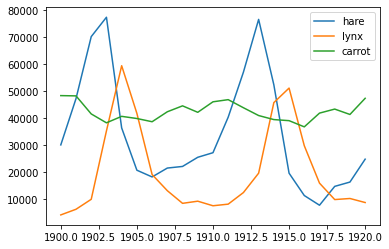


 Stat Properties 

 - Hares: Mean = 34080.95238095238, StdDev = 20897.906458089667
 - Lynxes: Mean = 20166.666666666668, StdDev = 16254.591536908763
 - Carrots: Mean = 42400.0, StdDev = 3322.5062255844787
Simple correlations: actually no correlation between lynxes and hares (population same year), but they tend to be in a circular environment. Maybe there are correlation between different years(see next) 



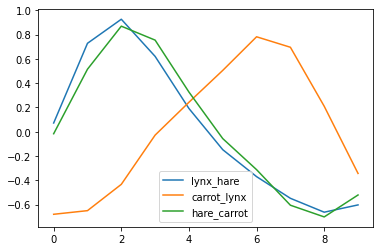

The graph shows correlation coefficients for different shifted-years. There are strong correlations between hares_carrot populations and lynx and hares population when shifted by 2 years. The correlation of carrots and lynxes instead shows a wider correlation, with the maximum hit after 7 years! 


In [248]:
from scipy import stats

fin = np.loadtxt("populations.txt")
year = np.array(fin[:,0])
hare = np.array(fin[:,1])
lynx = np.array(fin[:,2])
carrot = np.array(fin[:,3])

print("Populations' graph:")
plot1 = plt.figure(1)
plt.plot(year,hare, label = "hare")
plt.plot(year,lynx, label = "lynx")
plt.plot(year,carrot, label = "carrot")
plt.legend()
plt.show()

print("\n Stat Properties \n")
print(f" - Hares: Mean = {hare.mean()}, StdDev = {hare.std()}")
print(f" - Lynxes: Mean = {lynx.mean()}, StdDev = {lynx.std()}")
print(f" - Carrots: Mean = {carrot.mean()}, StdDev = {carrot.std()}")

print(f"Simple correlations: actually no correlation between lynxes and hares (population same year), but they tend to be in a circular environment. Maybe there are correlation between different years(see next) \n")

def shift(arr, num):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = arr[-num:]
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = arr[:-num]
        result[:num] = arr[-num:]
    else:
        result[:] = arr
    return result

l_hare = [np.corrcoef(lynx, shift(hare,i))[0,1] for i in np.arange(0,10)]
ca_lynx = [np.corrcoef(carrot, shift(lynx,i))[0,1] for i in np.arange(0,10)]
hare_carrot = [np.corrcoef(hare, shift(carrot,i))[0,1] for i in np.arange(0,10)]

plot3 = plt.figure(3)
plt.plot(np.arange(0,10), l_hare, label = "lynx_hare")
plt.plot(np.array(np.arange(0,10)), ca_lynx, label = "carrot_lynx")
plt.plot(np.array(np.arange(0,10)), hare_carrot, label = "hare_carrot")
plt.legend()
plt.show()
print("The graph shows correlation coefficients for different shifted-years. There are strong correlations between hares_carrot populations and lynx and hares population when shifted by 2 years. The correlation of carrots and lynxes instead shows a wider correlation, with the maximum hit after 7 years! ")